In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [261]:
data = pd.read_csv('Visadataset.csv')

Try to understand what the data looks like
Check the head, shape, data-types of the features.


If needed, rename the columns' names for easy use.
Basically check the missing values.

data.head()

In [262]:
data.shape

(25480, 12)

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Check if there are some dublicate rows or not. If there are, then drop them.

In [264]:
# Check if the Dataset have any Duplicate
data.duplicated().value_counts()

False    25480
dtype: int64

No duplicated data 

Check the statistical values of features.

In [265]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [266]:
# Check the sum of Missing Values per column
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

NO Missing values

In [267]:
cat = data.columns[data.dtypes == 'object']

In [268]:
num = data.columns[data.dtypes != 'object']

Look at the value counts of columns that have object datatype

In [269]:
data.describe(include="object").T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [270]:
for col in cat:
    print(col)
    print("--"*8)
    print(data[col].value_counts(dropna=False))
    print("--"*20)

case_id
----------------
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
----------------------------------------
continent
----------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------------------------
education_of_employee
----------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------------------------
has_job_experience
----------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
----------------------------------------
requires_job_training
----------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
----------------------------------------
re

# Case_status(Target Column)

Check the count of person in each "case_status" levels and visualize it with a countplot

In [271]:
data['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

<AxesSubplot:xlabel='case_status', ylabel='count'>

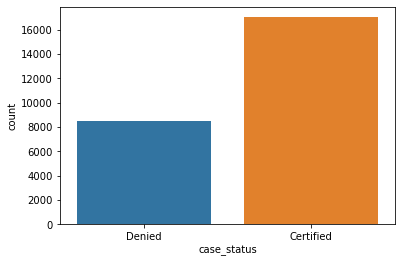

In [272]:
sns.countplot('case_status',data=data)

check the percentage of person in each "case_status" levels and visualize it with a pieplot.

In [273]:
data['case_status'].value_counts(normalize=True)

Certified    0.667896
Denied       0.332104
Name: case_status, dtype: float64

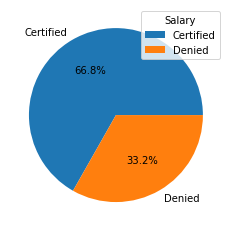

In [274]:
plt.pie(data['case_status'].value_counts(normalize=True), 
        labels=data['case_status'].value_counts(normalize=True).index,
        autopct="%.1f%%",
        
)
plt.legend(title="Salary")

observation: clearly, we can see imbalanced dataset.

# Numeric Features

In [275]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# no_of_employees

Check the boxplot to see extreme values

<AxesSubplot:xlabel='no_of_employees'>

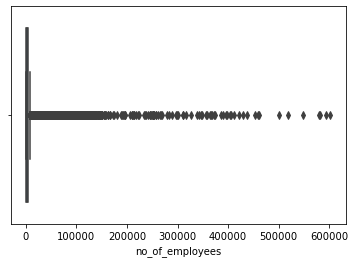

In [276]:
sns.boxplot('no_of_employees',data=data)

Check the histplot/kdeplot to see distribution of feature

<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

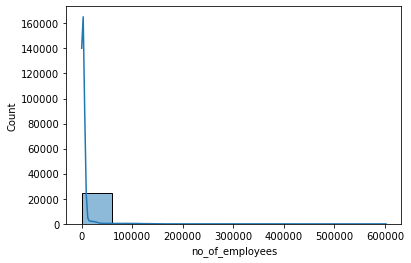

In [277]:
sns.histplot(x='no_of_employees',data=data, bins=10, kde=True)

Check the statistical values

In [278]:
data['no_of_employees'].describe()

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [279]:
len(data['no_of_employees'].unique())

7105

Check the boxplot and histplot/kdeplot by "case_status" levels

<AxesSubplot:xlabel='no_of_employees', ylabel='case_status'>

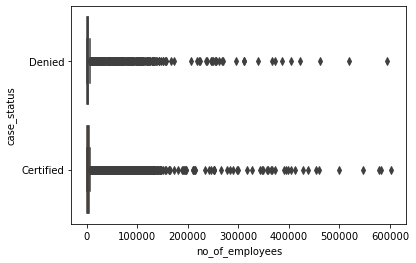

In [280]:
sns.boxplot(x='no_of_employees',y='case_status',data=data)

<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

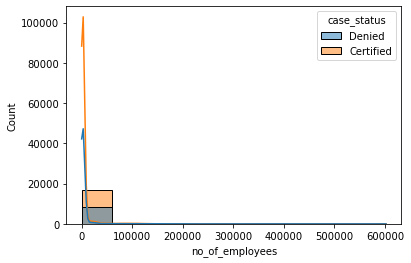

In [281]:
sns.histplot(data=data, x="no_of_employees", kde=True, hue="case_status", bins=10)

<AxesSubplot:xlabel='no_of_employees', ylabel='Density'>

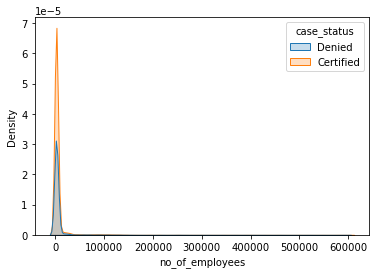

In [282]:
sns.kdeplot(data=data, x="no_of_employees", hue="case_status", fill=True)

Check the statistical values by "case_status" levels

In [283]:
data.groupby("case_status").describe()['no_of_employees']

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,17018.0,5807.018157,23119.575259,-26.0,1035.25,2147.0,3575.00,602069.0
Denied,8462.0,5385.538407,22382.755904,-26.0,991.00,2032.5,3386.75,594472.0


Observation: lots of outliers and data is not normally distributed

# prevailing_wage

<AxesSubplot:xlabel='prevailing_wage'>

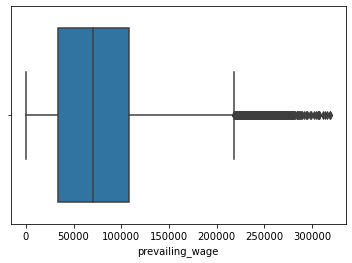

In [284]:
sns.boxplot(x='prevailing_wage',data=data)

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

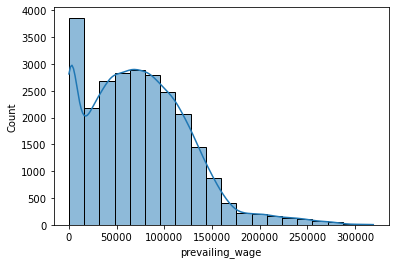

In [285]:
sns.histplot(x='prevailing_wage',data=data,bins=20,kde=True)

In [286]:
data['prevailing_wage'].describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

<AxesSubplot:xlabel='prevailing_wage', ylabel='case_status'>

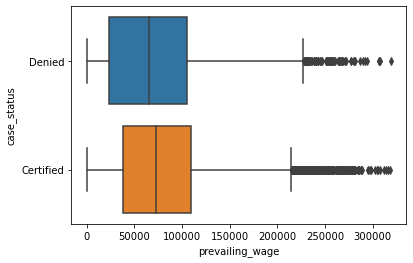

In [287]:
sns.boxplot(x='prevailing_wage',y='case_status',data=data)

<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

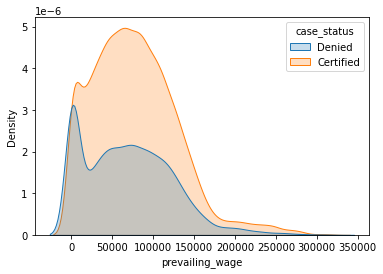

In [288]:
sns.kdeplot(data=data, x="prevailing_wage", hue="case_status", fill=True)

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

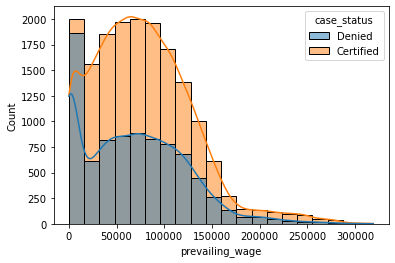

In [289]:
sns.histplot(data=data, x="prevailing_wage", kde=True, hue="case_status", bins=20)

In [290]:
data.groupby('case_status').describe()['prevailing_wage']

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,17018.0,77293.619243,52042.715576,2.1367,38375.330,72486.27,108879.1075,318446.05
Denied,8462.0,68748.681580,53890.166031,2.9561,23497.295,65431.46,105097.6400,319210.27


Observation: Right skewed data

# yr_of_estab

<AxesSubplot:xlabel='yr_of_estab'>

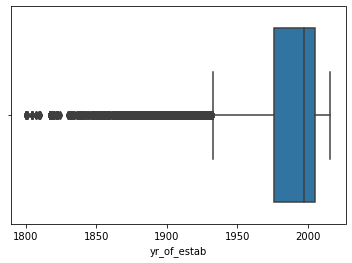

In [291]:
sns.boxplot(x='yr_of_estab',data=data)

<AxesSubplot:xlabel='yr_of_estab', ylabel='Count'>

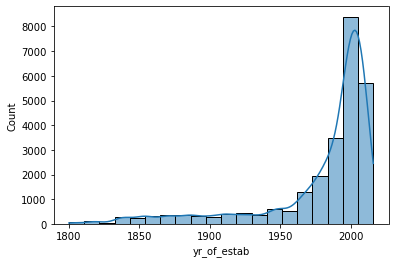

In [292]:
sns.histplot(x='yr_of_estab',data=data,bins=20,kde=True)

In [293]:
data['yr_of_estab'].describe()

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

<AxesSubplot:xlabel='yr_of_estab', ylabel='case_status'>

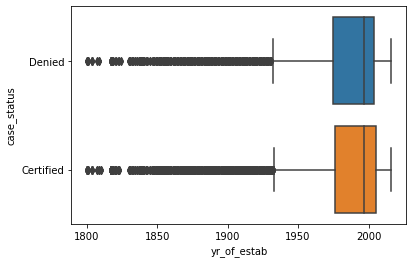

In [294]:
sns.boxplot(x='yr_of_estab',y='case_status',data=data)

<AxesSubplot:xlabel='yr_of_estab', ylabel='Density'>

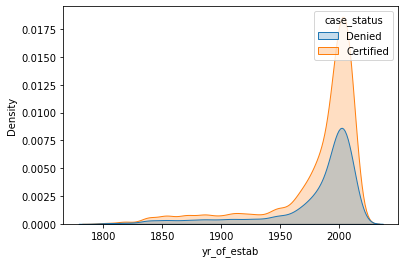

In [295]:
sns.kdeplot(data=data, x="yr_of_estab", hue="case_status", fill=True)

<AxesSubplot:xlabel='yr_of_estab', ylabel='Count'>

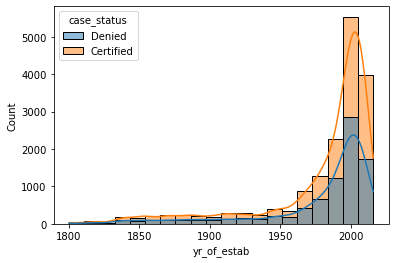

In [296]:
sns.histplot(data=data, x="yr_of_estab", kde=True, hue="case_status", bins=20)

Obersavation: clearly, left skewed data. Mosty recent orginsation have applied for Visa

See the relationship between each numeric features by target feature (case_status) in one plot basically

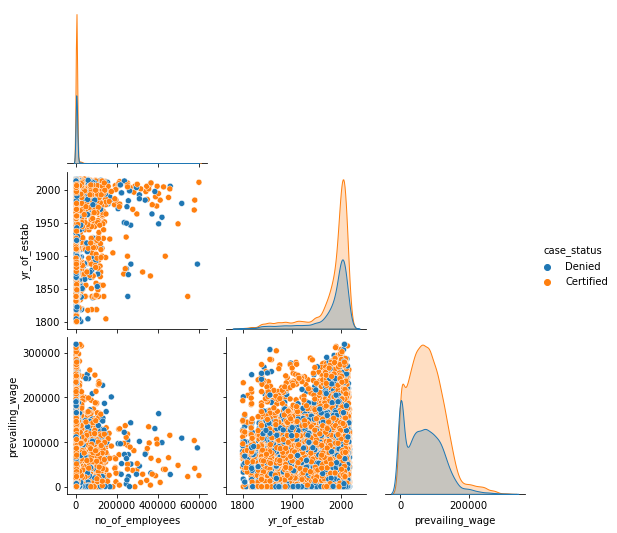

In [297]:
sns.pairplot(data, hue="case_status", corner=True)

Observation: No relation between no_of_employees, yr_of_estab and prevailling_wage

# Categorical Features

In [298]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# continent

In [300]:
data.groupby(by="continent")['case_status'].value_counts(dropna=False)

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: case_status, dtype: int64

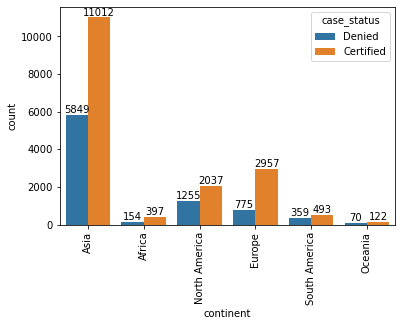

In [301]:
g=sns.countplot(data=data, x="continent", hue="case_status")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [302]:
continent = data.groupby("continent")["case_status"].value_counts(normalize=True)
continent

continent      case_status
Africa         Certified      0.720508
               Denied         0.279492
Asia           Certified      0.653105
               Denied         0.346895
Europe         Certified      0.792337
               Denied         0.207663
North America  Certified      0.618773
               Denied         0.381227
Oceania        Certified      0.635417
               Denied         0.364583
South America  Certified      0.578638
               Denied         0.421362
Name: case_status, dtype: float64

In [303]:
continent_df = pd.DataFrame(continent)
continent_df.rename(columns = {"case_status" : "percentage"}, inplace = True)
continent_df.reset_index(inplace = True)
continent_df.sort_values(by = ["case_status", "continent"], inplace=True)
continent_df

,continent,case_status,percentage
0,Africa,Certified,0.720508
2,Asia,Certified,0.653105
4,Europe,Certified,0.792337
6,North America,Certified,0.618773
8,Oceania,Certified,0.635417
10,South America,Certified,0.578638
1,Africa,Denied,0.279492
3,Asia,Denied,0.346895
5,Europe,Denied,0.207663
7,North America,Denied,0.381227


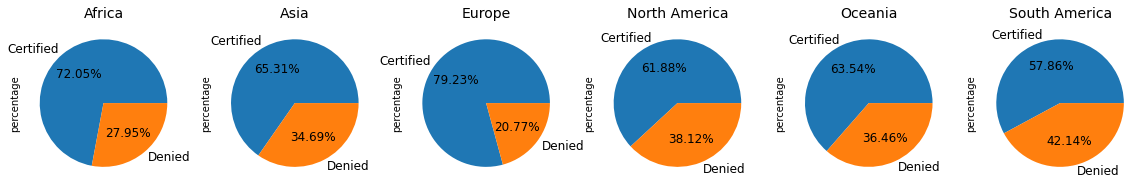

In [304]:
plt.figure(figsize = (20, 10))
index = 1
for c in list(continent_df['continent'].unique()):
    plt.subplot(1,len(list(continent_df['continent'].unique())),index)
    continent_df.groupby("continent")["percentage"].get_group(c).plot.pie(subplots=True,
                                             labels=list(continent_df['case_status'].unique()),
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             )
    plt.title(c, fontdict = {'fontsize': 14})
    index += 1

Observation: Most Asians travel a lot. 2/3 chance for approval of visa for  almost all continent. 

# education_of_employee

In [305]:
data.groupby(by="education_of_employee")['case_status'].value_counts(dropna=False)

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: case_status, dtype: int64

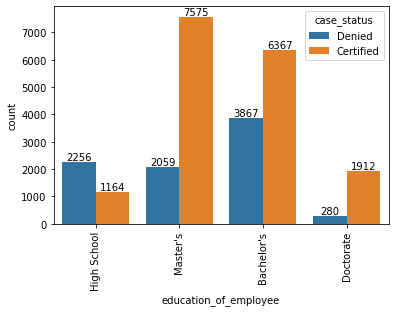

In [306]:
g=sns.countplot(data=data, x="education_of_employee", hue="case_status")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [307]:
education_of_employee = data.groupby("education_of_employee")["case_status"].value_counts(normalize=True)
education_of_employee

education_of_employee  case_status
Bachelor's             Certified      0.622142
                       Denied         0.377858
Doctorate              Certified      0.872263
                       Denied         0.127737
High School            Denied         0.659649
                       Certified      0.340351
Master's               Certified      0.786278
                       Denied         0.213722
Name: case_status, dtype: float64

In [308]:
education_of_employee_df = pd.DataFrame(education_of_employee)
education_of_employee_df.rename(columns = {"case_status" : "percentage"}, inplace = True)
education_of_employee_df.reset_index(inplace = True)
education_of_employee_df.sort_values(by = ["case_status", "education_of_employee"], inplace=True)
education_of_employee_df

,education_of_employee,case_status,percentage
0,Bachelor's,Certified,0.622142
2,Doctorate,Certified,0.872263
5,High School,Certified,0.340351
6,Master's,Certified,0.786278
1,Bachelor's,Denied,0.377858
3,Doctorate,Denied,0.127737
4,High School,Denied,0.659649
7,Master's,Denied,0.213722


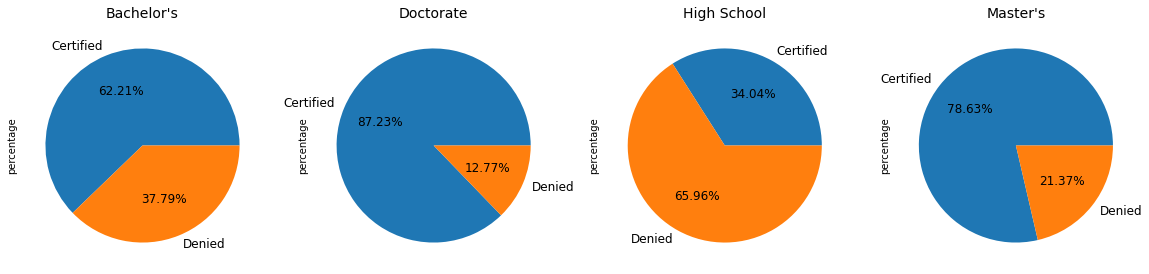

In [309]:
plt.figure(figsize = (20, 10))
index = 1
for c in list(education_of_employee_df['education_of_employee'].unique()):
    plt.subplot(1,len(list(education_of_employee_df['education_of_employee'].unique())),index)
    education_of_employee_df.groupby("education_of_employee")["percentage"].get_group(c).plot.pie(subplots=True,
                                             labels=list(education_of_employee_df['case_status'].unique()),
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             )
    plt.title(c, fontdict = {'fontsize': 14})
    index += 1

Observation: Mostly bachelor's and Master's degree holder apply for Visa. Also, there is good chance of your visa approval if you have atleast bachelor's degree

# has_job_experience

In [310]:
data.groupby(by="has_job_experience")['case_status'].value_counts(dropna=False)

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: case_status, dtype: int64

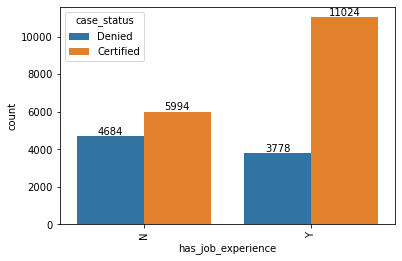

In [311]:
g=sns.countplot(data=data, x="has_job_experience", hue="case_status")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [312]:
has_job_experience = data.groupby("has_job_experience")["case_status"].value_counts(normalize=True)
has_job_experience

has_job_experience  case_status
N                   Certified      0.561341
                    Denied         0.438659
Y                   Certified      0.744764
                    Denied         0.255236
Name: case_status, dtype: float64

In [313]:
has_job_experience_df = pd.DataFrame(has_job_experience)
has_job_experience_df.rename(columns = {"case_status" : "percentage"}, inplace = True)
has_job_experience_df.reset_index(inplace = True)
has_job_experience_df.sort_values(by = ["case_status", "has_job_experience"], inplace=True)
has_job_experience_df

,has_job_experience,case_status,percentage
0,N,Certified,0.561341
2,Y,Certified,0.744764
1,N,Denied,0.438659
3,Y,Denied,0.255236


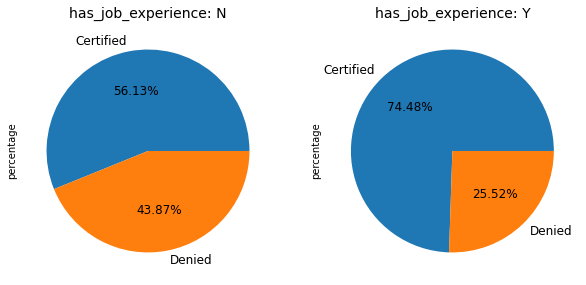

In [314]:
plt.figure(figsize = (10, 10))
index = 1
for c in list(has_job_experience_df['has_job_experience'].unique()):
    plt.subplot(1,len(list(has_job_experience_df['has_job_experience'].unique())),index)
    has_job_experience_df.groupby("has_job_experience")["percentage"].get_group(c).plot.pie(subplots=True,
                                             labels=list(education_of_employee_df['case_status'].unique()),
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             )
    plt.title("has_job_experience: "+c, fontdict = {'fontsize': 14})
    index += 1

Observation: There is good chance of your approval if you have job experience.

# requires_job_training

In [315]:
data.groupby(by="requires_job_training")['case_status'].value_counts(dropna=False)

requires_job_training  case_status
N                      Certified      15012
                       Denied          7513
Y                      Certified       2006
                       Denied           949
Name: case_status, dtype: int64

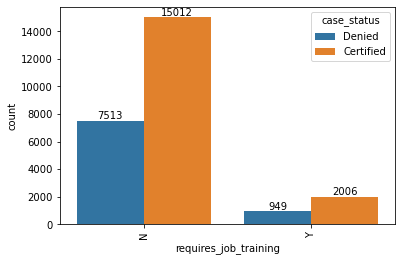

In [316]:
g=sns.countplot(data=data, x="requires_job_training", hue="case_status")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [317]:
requires_job_training = data.groupby("requires_job_training")["case_status"].value_counts(normalize=True)
requires_job_training

requires_job_training  case_status
N                      Certified      0.666459
                       Denied         0.333541
Y                      Certified      0.678849
                       Denied         0.321151
Name: case_status, dtype: float64

In [318]:
requires_job_training_df = pd.DataFrame(requires_job_training)
requires_job_training_df.rename(columns = {"case_status" : "percentage"}, inplace = True)
requires_job_training_df.reset_index(inplace = True)
requires_job_training_df.sort_values(by = ["case_status", "requires_job_training"], inplace=True)
requires_job_training_df

,requires_job_training,case_status,percentage
0,N,Certified,0.666459
2,Y,Certified,0.678849
1,N,Denied,0.333541
3,Y,Denied,0.321151


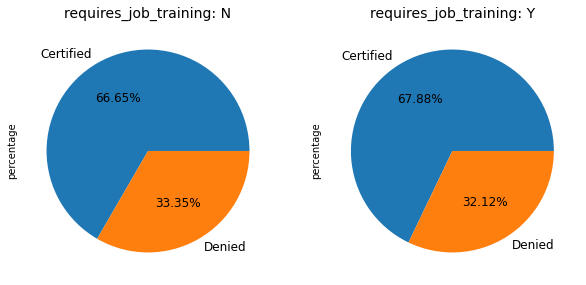

In [319]:
plt.figure(figsize = (10, 10))
index = 1
for c in list(requires_job_training_df['requires_job_training'].unique()):
    plt.subplot(1,len(list(requires_job_training_df['requires_job_training'].unique())),index)
    requires_job_training_df.groupby("requires_job_training")["percentage"].get_group(c).plot.pie(subplots=True,
                                             labels=list(requires_job_training_df['case_status'].unique()),
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             )
    plt.title("requires_job_training: "+c, fontdict = {'fontsize': 14})
    index += 1

Obersavation: Mostly trained employees applies for Visa

# unit_of_wage

In [320]:
data.groupby(by="unit_of_wage")['case_status'].value_counts(dropna=False)

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: case_status, dtype: int64

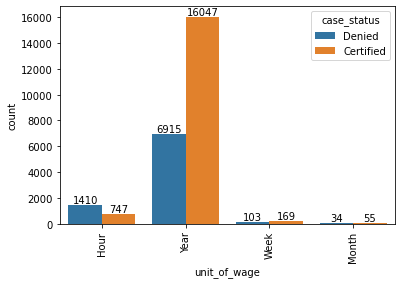

In [321]:
g=sns.countplot(data=data, x="unit_of_wage", hue="case_status")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [322]:
unit_of_wage = data.groupby("unit_of_wage")["case_status"].value_counts(normalize=True)
unit_of_wage

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: case_status, dtype: float64

In [323]:
unit_of_wage_df = pd.DataFrame(unit_of_wage)
unit_of_wage_df.rename(columns = {"case_status" : "percentage"}, inplace = True)
unit_of_wage_df.reset_index(inplace = True)
unit_of_wage_df.sort_values(by = ["case_status", "unit_of_wage"], inplace=True)
unit_of_wage_df

,unit_of_wage,case_status,percentage
1,Hour,Certified,0.346314
2,Month,Certified,0.617978
4,Week,Certified,0.621324
6,Year,Certified,0.698850
0,Hour,Denied,0.653686
3,Month,Denied,0.382022
5,Week,Denied,0.378676
7,Year,Denied,0.301150


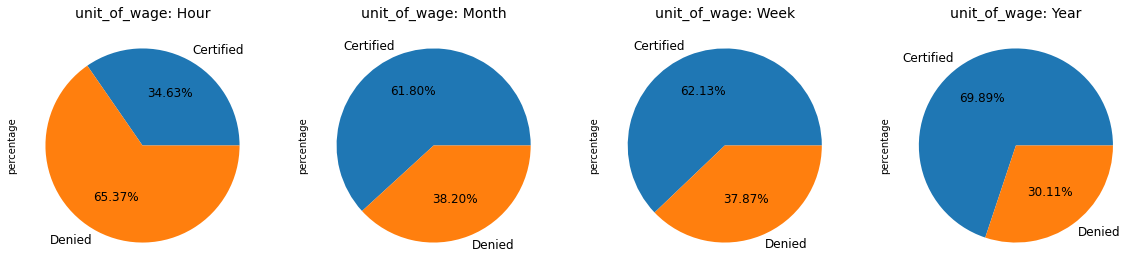

In [324]:
plt.figure(figsize = (20, 10))
index = 1
for c in list(unit_of_wage_df['unit_of_wage'].unique()):
    plt.subplot(1,len(list(unit_of_wage_df['unit_of_wage'].unique())),index)
    unit_of_wage_df.groupby("unit_of_wage")["percentage"].get_group(c).plot.pie(subplots=True,
                                             labels=list(requires_job_training_df['case_status'].unique()),
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             )
    plt.title("unit_of_wage: "+c, fontdict = {'fontsize': 14})
    index += 1

Observatioan: Most employees who apply for visa has unit of wage as year. There is good chance of your approval if your unit of wage is atleast week.

# full_time_position

In [325]:
data.groupby(by="full_time_position")['case_status'].value_counts(dropna=False)

full_time_position  case_status
N                   Certified       1855
                    Denied           852
Y                   Certified      15163
                    Denied          7610
Name: case_status, dtype: int64

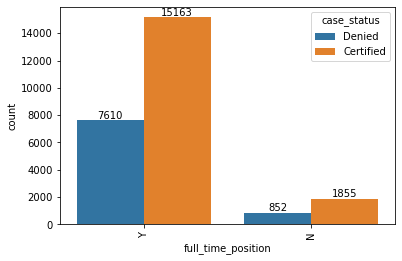

In [326]:
g=sns.countplot(data=data, x="full_time_position", hue="case_status")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [327]:
full_time_position = data.groupby("full_time_position")["case_status"].value_counts(normalize=True)
full_time_position

full_time_position  case_status
N                   Certified      0.685260
                    Denied         0.314740
Y                   Certified      0.665832
                    Denied         0.334168
Name: case_status, dtype: float64

In [328]:
full_time_position

full_time_position  case_status
N                   Certified      0.685260
                    Denied         0.314740
Y                   Certified      0.665832
                    Denied         0.334168
Name: case_status, dtype: float64

In [329]:
full_time_position_df = pd.DataFrame(full_time_position)
full_time_position_df.rename(columns = {"case_status" : "percentage"}, inplace = True)
full_time_position_df.reset_index(inplace = True)
full_time_position_df.sort_values(by = ["case_status", "full_time_position"], inplace=True)
full_time_position_df

,full_time_position,case_status,percentage
0,N,Certified,0.685260
2,Y,Certified,0.665832
1,N,Denied,0.314740
3,Y,Denied,0.334168


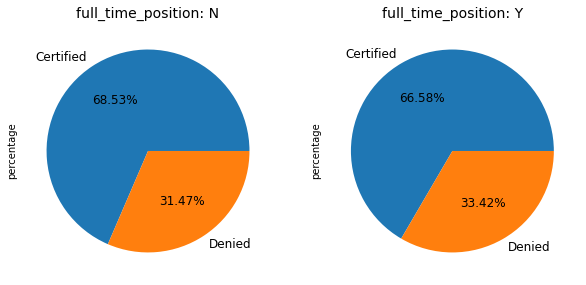

In [330]:
plt.figure(figsize = (10, 10))
index = 1
for c in list(full_time_position_df['full_time_position'].unique()):
    plt.subplot(1,len(list(full_time_position_df['full_time_position'].unique())),index)
    full_time_position_df.groupby("full_time_position")["percentage"].get_group(c).plot.pie(subplots=True,
                                             labels=list(full_time_position_df['case_status'].unique()),
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             )
    plt.title("full_time_position: "+c, fontdict = {'fontsize': 14})
    index += 1

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Observation: mostly with full time applies for visa